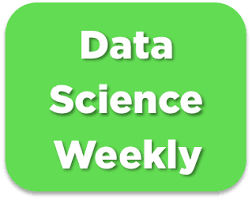

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

Projet

Les data scientists qui ont créé la newsletter souhaitent mieux comprendre le comportement des utilisateurs visitant leur site web. Ils aimeraient savoir s'il est possible de construire un modèle qui prédit si un utilisateur donné s'abonnera à la newsletter, en utilisant seulement quelques informations sur l'utilisateur. Ils souhaitent analyser les paramètres du modèle pour mettre en évidence des fonctionnalités importantes pour expliquer le comportement des utilisateurs, et peut-être découvrir un nouveau levier d'action pour améliorer le taux de conversion de la newsletter.

Ils ont conçu un concours visant à construire un modèle permettant de prédire les conversions (c'est-à-dire quand un utilisateur s'abonnera à la newsletter). Pour ce faire, ils ont ouvert un ensemble de données contenant des données sur le trafic sur leur site Web. Pour évaluer les classements des différentes équipes en compétition, ils ont décidé d'utiliser le score f1.



Le projet peut être découpé en quatre étapes :

Partie 1 : faire une EDA (Exploratory data analysis) et les prétraitements et entraîner un modèle de base avec le fichier data_train.csv
Partie 2 : améliorez le score f1 de votre modèle sur votre ensemble de test (vous pouvez essayer l'ingénierie de fonctionnalités, la sélection de fonctionnalités, la régularisation, les modèles non linéaires, l'optimisation d'hyperparamètres par recherche de grille, etc...)
Partie 3 : Une fois que vous êtes satisfait du score de votre modèle, vous pouvez l'utiliser pour faire des prédictions avec le fichier data_test.csv. Vous devrez vider les prédictions dans un fichier .csv qui sera envoyé à Kaggle (en fait, à votre professeur/TA 🤓). Vous pouvez faire autant de soumissions que vous le souhaitez, n'hésitez pas à essayer différents modèles !
Partie 4 : Prenez le temps d'analyser les paramètres de votre meilleur modèle. Existe-t-il des leviers d'action qui permettraient d'améliorer le taux de conversion de la newsletter ? Quelles recommandations feriez-vous à l'équipe ?

Livrable 📬

Pour mener à bien ce projet, votre équipe doit :

-Créez des chiffres pertinents pour l'EDA
-Former au moins un modèle qui prédit les conversions et évaluer ses performances (f1, matrices de confusion)
-Faire au moins une soumission au classement
-Analysez les paramètres de votre meilleur modèle et essayez de faire des recommandations pour améliorer le taux de conversion à l'avenir



# Import libraries

In [2]:
!pip install plotly 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

In [ ]:
# Read file with labels

In [4]:
# Jimporte mon dataset
data = pd.read_csv('conversion_data_train(1).csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [5]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [5]:
data.describe(include='all')
# Analyser les stats pr préparer mes préprocessing 

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [7]:
display(100*data.isnull().sum()/data.shape[0])

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [8]:
data[['age','converted']].groupby('converted').agg(['mean','median','min', 'max','count'])

age                        
                mean median min  max   count
converted                                   
0          30.697422     30  17   79  275400
1          26.567647     25  17  123    9180

In [9]:
data[['source','converted']].groupby('source').agg(['mean','count'])

converted        
            mean   count
source                  
Ads     0.034801   80027
Direct  0.027814   65076
Seo     0.032873  139477

In [10]:
data[['country','converted']].groupby('country').agg(['mean','count'])

converted        
             mean   count
country                  
China    0.001288   69122
Germany  0.062431   11693
UK       0.052497   43641
US       0.037908  160124

In [11]:
data[['new_user','converted']].groupby('new_user').agg(['mean', 'count'])

converted        
              mean   count
new_user                  
0         0.071933   89514
1         0.014052  195066

In [18]:
data.value_counts('country')

country
US         160124
China       69122
UK          43641
Germany     11693
dtype: int64

In [19]:
data.value_counts('new_user')

new_user
1    195066
0     89514
dtype: int64

[]

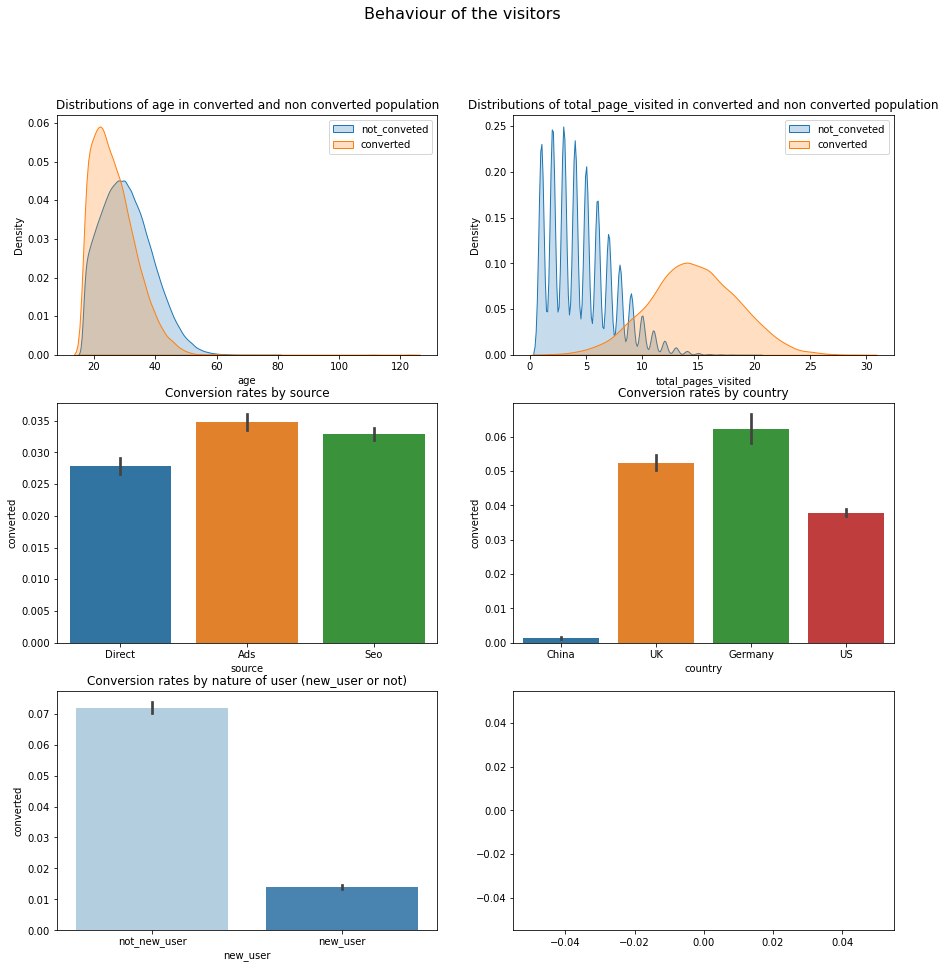

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(15,15))

#ax1 age
sns.kdeplot(data = data[data['converted'] == 0], x = 'age', shade = True, ax = ax1)
sns.kdeplot(data = data[data['converted'] == 1], x = 'age', shade = True, ax = ax1)
ax1.legend(['not_conveted', 'converted'])
#ax2 total_pages_visited
sns.kdeplot(data = data[data['converted'] == 0], x = 'total_pages_visited', shade = True, ax  = ax2)
sns.kdeplot(data = data[data['converted'] == 1], x = 'total_pages_visited', shade = True, ax  = ax2)
ax2.legend(['not_conveted', 'converted'])
#ax3 source
sns.barplot(data = data, x = 'source', y = 'converted', ax = ax3)
#ax4 country
sns.barplot(data = data, x = 'country', y = 'converted', ax = ax4)
#ax5 new_user
sns.barplot(data = data, x = 'new_user', y = 'converted', palette = 'Blues', ax = ax5)
ax5.set_xticklabels(['not_new_user', 'new_user'])

fig.suptitle('Behaviour of the visitors', fontsize = 16)
ax1.set_title('Distributions of age in converted and non converted population')
ax2.set_title('Distributions of total_page_visited in converted and non converted population')
ax3.set_title('Conversion rates by source')
ax4.set_title('Conversion rates by country')
ax5.set_title('Conversion rates by nature of user (new_user or not)')

plt.plot()

-Les petites barres représentent l'incertitude sur ce calcul, il faut comparer la barre d'erreur par rapport à la différence entre la conversion de chaque catégorie, mon incertitude va être plus grande qd j'ai peu de valeurs dans mon dataset. 

-1er graphique: deux courbes qui nous montrent le taux de conversion selon l'âge. C'est un facteur déterminant car la majorité des personnes qui se sont converties ont entre 17 et 30 ans alors que le site attire des personnes de 17 à 60 ans.
recommandation : Ciblez les annonces vers les personnes entre 17 et 30 ans

2ème graphique Le nombre de pages visitées :
Nous pouvons voir que les personnes qui s'abonnent semblent visiter beaucoup plus de pages (en moyenne 15 pages) par rapport aux simples visiteurs ne visitent que quelques pages.
recommandation : Amener les gens à visiter plus de pages mais pas trop, plus de ciblage sur les personnes susceptibles d'acheter et attention à ne pas compliquer la navigation sur le site.

3ème graphique La source:
Faire des publicités semble l'outil le plus puissant pour amener les gens à s'abaonner. On peut essayer d'investir plus sur les annonces (se concentrer sur l'âge et sur les pays).recommandation : On pourrait utiliser des liens sur les réseaux sociaux..

4ème graphique Les pays:
Les visiteurs viennent des États-Unis, du Royaume-Uni, d'Allemagne et de Chine. Les gens viennent principalement des États-Unis le site Web est probablement américain. Bien que les Chinois visitent en 2ème lieu le site, ils ne sont pas du tout susceptibles de s'abonner alors que les Allemands le sont en proportion des visiteurs, la probabilité de conversion est suivie par les visiteurs britanniques et américains. 
Recommandation : Essayez de cibler davantage les Allemands car ce sont eux qui s'abonnent le plus en proportion. traduire le site Web dans différentes langues afin qu'il puisse attirer d'autres acheteurs potentiels. Essayez d'avoir une meilleure cible sur les personnes venant du Royaume-Uni et des États-Unis (avec des annonces).

5ème graphique Nouveaux utilisateurs:
Nous pouvons observer que les "anciens utilisateurs" s'abonnent deux fois plus que les nouveaux utilisateurs, mais en même temps, il y a deux fois plus de nouveaux utilisateurs que d'anciens utilisateurs (nous aurons probablement besoin de regardez plus précisément ce qui se passe avec les nouveaux utilisateurs).
Recommandation : il est important de rester en contact avec les nouveaux utilisateurs car ils sont plus susceptibles de s'abonner autrement d'acheter au fil du temps (notification push, newsletter, remises..). Nous devons également continuer à attirer de nouveaux utilisateurs car ce sont eux qui visitent le plus le site Web.

<AxesSubplot:xlabel='total_pages_visited'>

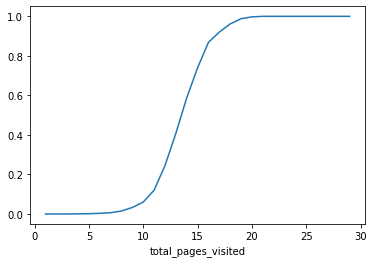

In [13]:
#Visualizing the conversion of a site by 'total_sales_visited'
data.groupby(['total_pages_visited'])['converted'].mean().plot()

Le graphique ci-dessus montre que passer plus de temps sur le site Web entraîne des conversions plus élevées. 
Cependant, il serait idéal que le consommateur visite un nombre de pages inférieur pour acheter un produit. 
Le consommateur moyen qui a un taux de conversion de 80% parcourt 17 pages.

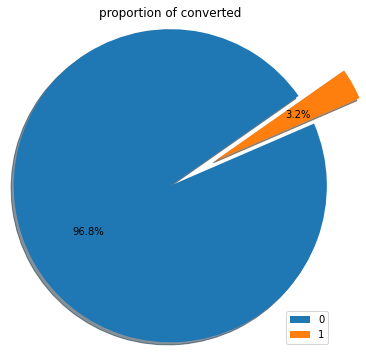

In [14]:
converted_number = data.converted.value_counts()
plt.figure(figsize = (8, 6))
plt.pie(converted_number, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2, explode=[0.0,0.4])
plt.legend(converted_number.index, loc='lower right')
plt.title("proportion of converted")

plt.show()

In [16]:
# un taux de conversion d'environ 3 % qui est la norme de l'industrie 

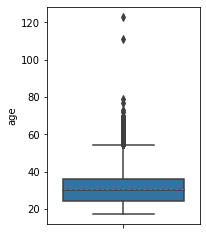

In [15]:
plt.subplot(122)
sns.boxplot(y='age', data=data, showmeans = True, meanline=True)

plt.show()

In [16]:
#Looking at the number of people more than 100
data[data['age'] >= 100]

,country,age,new_user,source,total_pages_visited,converted
11331,UK,111,0,Ads,10,1
233196,Germany,123,0,Seo,15,1


In [5]:
#Removing the 2 datapoints with age > 100 from the dataset.
data = data[data['age'] < 100]

In [6]:
data.shape

(284578, 6)

 Quelques remarques rapides :
-Le site est probablement un site américain, bien qu'il ait également une grande base d'utilisateurs chinois
-La base d'utilisateurs est assez jeune la moyenne d'âge est à 30 ans celà dit il y a deux valeurs abérrantes 111 ans et 123 ans on décide de les supprimer.
-Le taux de conversion d'environ 3% est la norme de l'industrie.Cela montre également que nous travaillons avec un ensemble de données déséquilibré car nous avons 9 180  conversions contre 275 400.


<AxesSubplot:>

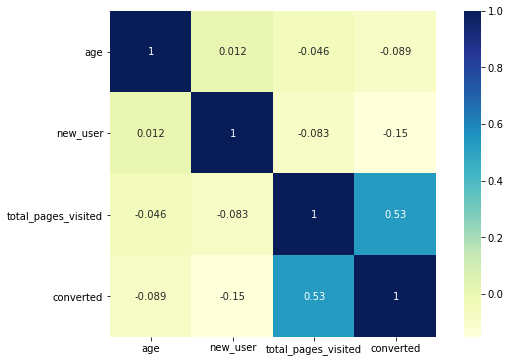

In [19]:
#Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr( ), cmap="YlGnBu", annot = True, square = True)

On peut dire que la vble quantitative la plus corrélée avec la target "converted" est la vble "total_pages_visited",
c'est pour cette raison que dans le modèle de base on commence par cette variable qui est la plus déterminante. 

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [20]:
# 1ère étape je définis mes X et mon Y:

features_list = ['total_pages_visited']
target_variable = 'converted'
# Comme on va travailler sur une regrssion logistique univariée on aura un seul X total_pages_visited
# On fait une regression linéaire parce que notre target est une vble catégorique 

In [21]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [22]:
# 2ème étape je fais mon train test_split:  
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()
# Qd on travaille en classification il faut rajouter l'argument stratify,je dois passer la colonne qui contient mes labels ça sert 
# à avoir la mm proportion de Y dans le train et dans le test qd on sépare le dataset sinon on peut avoir dans le test set que des 0 pr Y 

Dividing into train and test sets...
...Done.



In [23]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[4]
 [5]
 [3]
 [1]
 [6]]
[[14]
 [ 5]]

[0 0 0 0 0]
[0 0]


## Training pipeline

In [24]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])
# Comme préprocessing on a juste à normaliser les données numériques 
# Notre label est déjà encoder on n'a pas à faire le label encoding 

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26099836]
 [ 0.03829244]
 [-0.56028917]
 [-1.15887077]
 [ 0.33758325]]


In [25]:
# Train model
print("Train model...")
classifier = LogisticRegression() # on instancie notre modèle 
classifier.fit(X_train, Y_train)
print("...Done.")
# On va entrainer le modèle pour qu'il puisse séparer au mieux les points par une droite linéaire 
# L'entrainement de la régression logitique consiste à trouver les valeurs des coef beta 0, beta 1..qui vont permettre de séparer 
# au mieux les y =0 et les y=1 

Train model...
...Done.


In [26]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()
# Il faut vérifier s'il y a une cohérence en termes de prédictions avec notre target, on voit des 0 et certainement des 1 prédi 
# converted et non converted 

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [27]:
# Pour le test pipeline on va utiliser les mm prépocessing que le train mais au lieu d'utiliser le fit_transform on utilise transform
print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])
# on doit normaliser aussi nos données de test 

Encoding categorical features and standardizing numerical features...
...Done
[[ 2.73190968]
 [ 0.03829244]
 [-0.26099836]
 [ 0.93616485]
 [ 0.93616485]]


In [28]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()
# je fais une prédiction sur les données de test qui sont inconnus du modèle 

Predictions on test set...
...Done.
[1 0 0 ... 0 0 0]



## Performance assessment

In [29]:
# J'ai fait mes prédictions sur le train et sur le test, là je peux calculer mon f1-score pour comprarer les prédictions du modèle 
# aux vrais valeurs et sortir un score qui me dit si c'est bien ou pas, le test set il fait office qu'est ce qui se passerai sur 
# des données que mon modèle n'a jamais vu on s'intèresse au score du test pr évaluer à quelle performance je peux m'attendre si je
# mettait mon modèle en production et que je faiais des prédictions sur des nouvelles données, il faut comparer le score du train
# au score du test et normalement notre modèle n'est pas censsé faire un meilleur score sur le test
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred)) 

f1-score on train set :  0.6950136373172948
f1-score on test set :  0.6961394769613949


In [30]:
data['converted'].value_counts()
# comme notre dataset est déséquilibrée il y a bcp plus de 0 que de 1 on évite d'utiliser l'accuracy qui va nous donner 
# un bon faux score c'est pr ça qu'on utilise le f1 score qui est plus robuste pr ce cas 

0    275400
1      9178
Name: converted, dtype: int64

In [31]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()
# la matrice de confusion est une matrice qui mesure la qualité d'un système de classification, on s'intèresse à la ligne 
# orthogonale pr le train set on a 1070 FN et 3291 FP(c'est le nbre qui nous intéresse le pus c'est les personnes qui ne se sont
# pas convertis réellement)

Confusion matrix on train set : 
[[246790   1070]
 [  3291   4969]]

Confusion matrix on test set : 
[[27411   129]
 [  359   559]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [32]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [33]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test(1).csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [34]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33049128]
 [ 0.03829244]
 [-1.15887077]
 [ 0.33758325]
 [-0.56028917]]


In [35]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

In [ ]:
#Comme la target répond par oui ou non donc c'est une vble catégorielle c'est une calssification binaire 

In [ ]:
# J'ajoute feature par feature c'est la forward séléction 
# hyperparamètres 
# decision tree
# Random Forest
# XGBoost

In [12]:
# ------------(2)
features_list = ['total_pages_visited','age']
target_variable = 'converted'

In [13]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]
print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited', 'age'], dtype='object')



In [14]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [15]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 2 23]
 [ 2 28]
 [ 7 30]
 [ 3 37]
 [ 8 31]]
[[14 24]
 [ 5 35]]

[0 0 0 0 0]
[0 0]


-------Training pipeline

In [16]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])
#Comme préprocessing on a juste à normaliser les données numériques 

Encoding categorical features and standardizing numerical features...
...Done
[[-0.85939501 -0.91458053]
 [-0.85939501 -0.30994956]
 [ 0.63639894 -0.06809718]
 [-0.56023622  0.77838618]
 [ 0.93555773  0.05282902]]


In [17]:
# Train model
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [18]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



----------Test pipeline

In [19]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 2.73051047 -0.79365434]
 [ 0.03808136  0.53653379]
 [-0.26107743 -0.18902337]
 [ 0.93555773  0.05282902]
 [-0.85939501 -0.30994956]]


In [20]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1 0 0 ... 0 0 0]



-----------------Performance assessment

In [21]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))


f1-score on train set :  0.7094813894068089
f1-score on test set :  0.7002487562189055


In [22]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246778   1082]
 [  3125   5137]]

Confusion matrix on test set : 
[[27413   127]
 [  355   563]]



In [25]:
# -------------- (3)

features_list = ['total_pages_visited','age','new_user']
target_variable = 'converted'

In [26]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited', 'age', 'new_user'], dtype='object')



In [27]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [28]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 2 23  0]
 [ 2 28  0]
 [ 7 30  1]
 [ 3 37  1]
 [ 8 31  1]]
[[14 24  1]
 [ 5 35  0]]

[0 0 0 0 0]
[0 0]


In [29]:
# Create pipeline for numeric features
numeric_features = [0,1] # Positions of numeric columns in X_train/X_test
numeric_transformer = StandardScaler()

In [30]:
# Create pipeline for categorical features
categorical_features = [2] # Positions of categorical columns in X_train/X_test
categorical_transformer = OneHotEncoder(drop='first')

In [31]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
# On utilise le columnTransformer parce qu'on a deux différents transformeurs un pr les vbles catégorique et un autre 
# pr les vbles numériques 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[[ 2 23  0]
 [ 2 28  0]
 [ 7 30  1]
 [ 3 37  1]
 [ 8 31  1]]
...Done.
[[-0.85939501 -0.91458053  0.        ]
 [-0.85939501 -0.30994956  0.        ]
 [ 0.63639894 -0.06809718  1.        ]
 [-0.56023622  0.77838618  1.        ]
 [ 0.93555773  0.05282902  1.        ]]

Performing preprocessings on test set...
[[14 24  1]
 [ 5 35  0]
 [ 4 29  0]
 [ 8 31  1]
 [ 2 28  1]]
...Done.
[[ 2.73051047 -0.79365434  1.        ]
 [ 0.03808136  0.53653379  0.        ]
 [-0.26107743 -0.18902337  0.        ]
 [ 0.93555773  0.05282902  1.        ]
 [-0.85939501 -0.30994956  1.        ]]



In [32]:
# Train model
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)
print("...Done.")
# L'entrainement du modèle s'est de trouvé les betas qui permettent de séparer au mieux les Y = 0 des Y=1

Train model...
...Done.


In [33]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



----------Test pipeline

In [34]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



-----------------Performance assessment

In [35]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7429037077278283
f1-score on test set :  0.7393422655298416


In [36]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246866    994]
 [  2792   5470]]

Confusion matrix on test set : 
[[27423   117]
 [  311   607]]



In [ ]:
# malgré le graphique de new user qui apparemment n'avait pas d'influence sur la conversion améliore le score est
#ce qu'il faut comprendre que les features intéragissent entre eux et améliorent ainsi le score 

In [37]:
# -------"country" (4)

features_list = ['total_pages_visited','age','new_user','country']
target_variable = 'converted'

In [38]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited', 'age', 'new_user', 'country'], dtype='object')



In [39]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [40]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[2 23 0 'China']
 [2 28 0 'China']
 [7 30 1 'China']
 [3 37 1 'UK']
 [8 31 1 'US']]
[[14 24 1 'China']
 [5 35 0 'US']]

[0 0 0 0 0]
[0 0]


In [41]:
# Create pipeline for numeric features
numeric_features = [0,1] # Positions of numeric columns in X_train/X_test
numeric_transformer = StandardScaler()
# Là on déclare une instance de standarscaler pr normaliser 

In [42]:
# Create pipeline for categorical features
categorical_features = [2,3] # Positions of categorical columns in X_train/X_test
categorical_transformer = OneHotEncoder(drop='first')
#On déclare une instance de OHE pr encoder 

In [43]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:])
print()
#On est entrain de préparer les données avant de les mettre dans le modèle 

Performing preprocessings on train set...
[[2 23 0 'China']
 [2 28 0 'China']
 [7 30 1 'China']
 [3 37 1 'UK']
 [8 31 1 'US']]
...Done.
[[-0.85939501 -0.91458053  0.          0.          0.          0.        ]
 [-0.85939501 -0.30994956  0.          0.          0.          0.        ]
 [ 0.63639894 -0.06809718  1.          0.          0.          0.        ]
 [-0.56023622  0.77838618  1.          0.          1.          0.        ]
 [ 0.93555773  0.05282902  1.          0.          0.          1.        ]]

Performing preprocessings on test set...
[[14 24 1 'China']
 [5 35 0 'US']
 [4 29 0 'US']
 [8 31 1 'China']
 [2 28 1 'US']]
...Done.
[[ 2.73051047 -0.79365434  1.          0.          0.          0.        ]
 [ 0.03808136  0.53653379  0.          0.          0.          1.        ]
 [-0.26107743 -0.18902337  0.          0.          0.          1.        ]
 [ 0.93555773  0.05282902  1.          0.          0.          0.        ]
 [-0.85939501 -0.30994956  1.          0.          0. 

In [44]:
# Train model
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)
print("...Done.")
#

Train model...
...Done.


In [45]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [46]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



-----------------Performance assessment

In [47]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7635487755921317
f1-score on test set :  0.7581620314389359


In [48]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246882    978]
 [  2556   5706]]

Confusion matrix on test set : 
[[27431   109]
 [  291   627]]



In [7]:
#-------"source" (5)

features_list = ['total_pages_visited','age','new_user','country','source']
target_variable = 'converted'

In [8]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]
print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited', 'age', 'new_user', 'country', 'source'], dtype='object')



In [9]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [10]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[4 18 0 'US' 'Seo']
 [5 49 0 'China' 'Seo']
 [3 46 1 'China' 'Seo']
 [1 18 0 'US' 'Ads']
 [6 22 1 'US' 'Ads']]
[[14 24 1 'China' 'Ads']
 [5 35 0 'US' 'Direct']]

[0 0 0 0 0]
[0 0]


In [11]:
# Create pipeline for numeric features
numeric_features = [0,1] # Positions of numeric columns in X_train/X_test
numeric_transformer = StandardScaler()

In [12]:
# Create pipeline for categorical features
categorical_features = [2,3,4] # Positions of categorical columns in X_train/X_test
categorical_transformer = OneHotEncoder(drop='first')

In [13]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[[4 18 0 'US' 'Seo']
 [5 49 0 'China' 'Seo']
 [3 46 1 'China' 'Seo']
 [1 18 0 'US' 'Ads']
 [6 22 1 'US' 'Ads']]
...Done.
[[-0.26099836 -1.51987065  0.          0.          0.          1.
   0.          1.        ]
 [ 0.03829244  2.2307148   0.          0.          0.          0.
   0.          1.        ]
 [-0.56028917  1.86775492  1.          0.          0.          0.
   0.          1.        ]
 [-1.15887077 -1.51987065  0.          0.          0.          1.
   0.          0.        ]
 [ 0.33758325 -1.03592414  1.          0.          0.          1.
   0.          0.        ]]

Performing preprocessings on test set...
[[14 24 1 'China' 'Ads']
 [5 35 0 'US' 'Direct']
 [4 29 0 'US' 'Direct']
 [8 31 1 'China' 'Seo']
 [8 25 1 'China' 'Ads']]
...Done.
[[ 2.73190968 -0.79395089  1.          0.          0.          0.
   0.          0.        ]
 [ 0.03829244  0.53690202  0.          0.          0.          1.
   1.          0.        ]
 [-0.2609983

In [56]:
# Train model
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [57]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [58]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



-----------------Performance assessment

In [59]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7640283915896611
f1-score on test set :  0.7595396729254997


In [60]:
# La matrice de confusion: La matrice de confusion est un outil qui nous renseigne sur les performances du modèle par rapport à
#la prédiction. Elle se résume en quatre élements: Les Vrais positivfs (TP), Vrais négatifs (TN), Faux Positifs (FP) et Faux Négatifs (FN). 
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246893    967]
 [  2557   5705]]

Confusion matrix on test set : 
[[27434   106]
 [  291   627]]



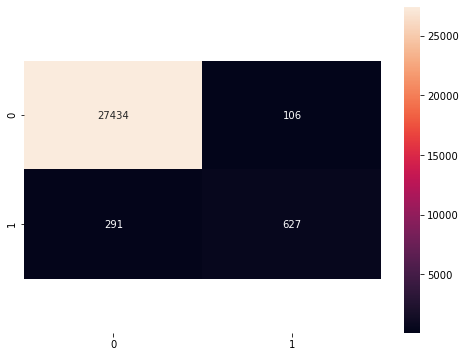

In [61]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

--------------------------------Les hyperparamètres: faire une regression logistique avec un grid search 

In [ ]:
# On fait un cross val score pour obtenir un score plus robuste 

In [62]:
scores= cross_val_score(classifier, X_train, Y_train, cv=10, scoring='f1')
print('The cross-validated score is: ', scores.mean())
print('The standard deviation is: ', scores.std())
# Comme on a choisit de travailler avec f1 score il faut changer le scoring par défaut qui est l'accuracy et le remplacer par f1
# La validation croisée est une technique générale en statistique qui permet d'évaluer à quel pt mon score risque de changer juste si
# je change mon test set si mon score de test par rapport à mon score de train varie au delà de l'écart type qu'on a trouvé 
# à ce moment là c'est de l'overfitting. La cross validation tte seule sert juste à vérifier si la diffrence entre mon score de train et 
# mon score de test est du à l'incertitude ou à l'overfitting. Donc on peut dire qu'on overfitte pas! 

The cross-validated score is:  0.7640383846582324
The standard deviation is:  0.009204176571160001


In [ ]:
# Ridge joue sur la valeur des coef du modèle càd à quel pt je vais prendre en compte chaque feature, le ridge va diminiué les coef
# moins mon modèle va avoir de grande fluctuation donc moins il va overfitter. Pour déterminer la meilleur valeur de lamda on lance 
# un grid search avec une validation croisée 

In [24]:
# Train model
print("Train model...")
params={"C":[1,1.2,1.4], "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()# je déclare une instance sur le modèle auquel je veux faire mon grid search 
logreg_cv=GridSearchCV(logreg,params,cv=10,scoring='f1')
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("f1 score :",logreg_cv.best_score_)

Train model...
tuned hpyerparameters :(best parameters)  {'C': 1.2, 'penalty': 'l2'}
f1 score : 0.764120418003435


In [25]:
# Predictions on training set sur le modèle optimal 
print("Predictions on training set...")
Y_train_pred = logreg_cv.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [26]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = logreg_cv.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [27]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7642058764473596
f1-score on test set :  0.7595396729254997


In [ ]:
# en rajoutant tous les autres features notre score s'est amélioré par rapport à la baseline il passe de 0.6961394769613949
# à 0.7595396729254997 par contre en voulant jouer sur l'hyperparamètre en faisant un grid search avec une validation croisé
# on a pas eu d'amélioration.

------------------------Decision Tree

In [ ]:
# L'entrainement de l'arbre de décsion c'est de trouver les meilleurs crières de divison y a pas la notion de chercher les meilleurs
# coefs à mettre dans ma fonction pr prédire Y.  
# Stopping criteriom à quel moment j'arrête de diviser un noeud une régle pr savoir qd est ce qu'un noeud est terminal et assigner une valeur au noeud terminal 
# Random forest je vais entrainer m arbre de decision et je vais les combiner pour faire des prédictions on va regrouper ttes les 
# descisions de ces arbres c'est ce qu'on appelle méthode ensembliste.
#Le random forest c'est un bagging (c'est la combinaison de boodstrap et agregating) de desicion tree, le boodstrap c'est une méthode
#d'échantillonnage qui nous permet de se créer un échantihhon de données qui est plus grand à la base tirage avec remise 
# le boodstarp me permet de créer p train set représentative de mon dataset d'origine et qui sont un petit peu différents les uns
#des autres, un random forest je vais entrainer un decision tree pr chacun de ces p train set.
# Le random forest et le bagging ce sont des méthodes ensemblistes qui fonctionnenet en parallèle, pour la classification je vais 
#utiliser le mode pr regrouper ttes ces prédictions et pour une régression si y est quatntitatives pr aggréger ces prédictions 
#j'utilise la moyenne 

In [13]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()# je déclare un objet que j'appelle classifier, cette objet c'est une instance de la classe DecisionTreeClassifier

# Pour optimiser ces hyperparamètres je lance une grid search 
params = {
    'max_depth': [8,10,12],#la profondeur maximale de l'arbre, c'est le max de test que l'algo peux faire
    'min_samples_leaf': [12,14,16],# si je vois que les dicions que je peux faire vont me cééer des noeuds enfants qui ont moins que le min je ne peux pas faire de division
    'min_samples_split': [2,4,8]#combien est ce qu'il faut d'exemples dans un noeud pr pouvoir faire une division
}
#pour optimiser ces hyperparamètres on lance un gridsearch avec cv =10 ce qui nous fait 270 entrainements au total
tree_best= GridSearchCV(classifier, param_grid = params, cv = 10) 
tree_best.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", tree_best.best_params_)
print("Best validation accuracy : ", tree_best.best_score_)
# on fonctionne par dichotomie pr choisir les meilleurs hyperparamètres

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 14, 'min_samples_split': 2}
Best validation accuracy :  0.9853975828932577


In [14]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = tree_best.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [15]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = tree_best.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [16]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.764063132335087
f1-score on test set :  0.7548309178743962



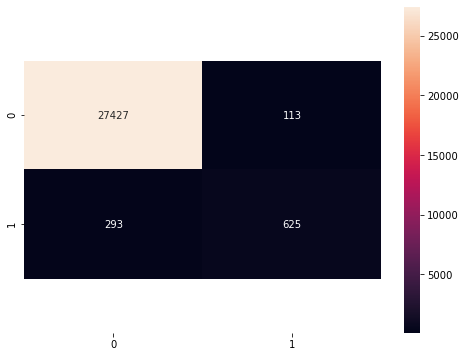

In [17]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
#feature importance plus la vble est testée et plus elle permet de baisser l'hétérogénité plus elle est importante elle est calculée 
#soit par criterion gini par défaut soit par entropy 

In [ ]:
-------------------------------Random Forest 

In [18]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [8,10,12],
    'min_samples_leaf': [16,18,20],
    'min_samples_split': [2,4,8],
    'n_estimators': [40,60]# le nbre d'arbre optimal 
}
forest_best = GridSearchCV(classifier, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
forest_best.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", forest_best.best_params_)
print("Best validation accuracy : ", forest_best.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 2, 'n_estimators': 60}
Best validation accuracy :  0.9860418072086299


In [19]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = forest_best.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [20]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = forest_best.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [21]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7681888285388587
f1-score on test set :  0.7519708914493632



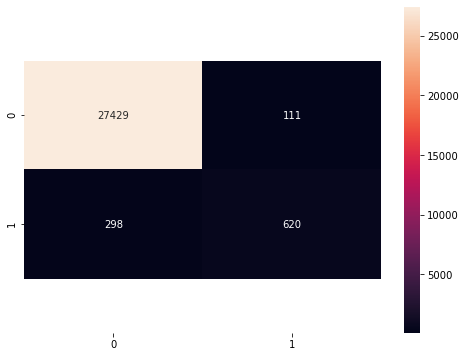

In [22]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

-------------------------------GradientBoostingClassifier

In [62]:
print("Train model...")
classifier_xgb =GradientBoostingClassifier()
classifier_xgb.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [63]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_xgb.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [64]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_xgb.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [65]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7640524625267665
f1-score on test set :  0.7545126353790613



In [82]:
classifier_xgb= GradientBoostingClassifier()
parameters = {'n_estimators':[50, 100, 150, 200],
              "learning_rate":[1.0, 0.5, 0.1]}

classifier_xgb_best = GridSearchCV(classifier_xgb,parameters)
classifier_xgb_best.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 4, 'n_estimators': 60}
Best validation accuracy :  0.9860535210778074


In [84]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_xgb_best.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [85]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_xgb_best.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [86]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.764886515353805
f1-score on test set :  0.7567567567567568



In [ ]:
-------------------------------AdaBoostClassifier (with base_estimator DecisionTreeClassifier )

In [94]:
print("Train model...")
classifier_ada =AdaBoostClassifier()
classifier_ada.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [95]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_ada.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [96]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_ada.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [97]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7497773820124667
f1-score on test set :  0.7472118959107806



In [ ]:
------------------------------AdaBoostClassifier (with base_estimator= LogisticRegression())

In [13]:
print("Train model...")
classifier = LogisticRegression() 
classifier_ada =AdaBoostClassifier(base_estimator=classifier)
classifier_ada.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [14]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_ada.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [15]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_ada.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [16]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7536094993927944
f1-score on test set :  0.7483323226197695



In [ ]:
------------------------------AdaBoostClassifier (with base_estimator= LogisticRegression() with grid_search)

In [14]:
print("Train model...")
classifier = LogisticRegression() 
classifier_ada =AdaBoostClassifier(base_estimator=classifier)
params = {'n_estimators':[50, 100, 150, 200],
              "base_estimator__C":[1,1.2,1.4]}
gridsearch_ada_best= GridSearchCV(classifier_ada, param_grid = params, cv = 10) 

Train model...


In [14]:
gridsearch_ada_best.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_ada_best.best_params_)
print("Best validation accuracy : ", gridsearch_ada_best.best_score_)
# on fonctionne par dichotomie pr choisir les meilleurs hyperparamètres

Train model...
...Done.
Best hyperparameters :  {'base_estimator__C': 1.4, 'n_estimators': 200}
Best validation accuracy :  0.986123692019366


In [13]:
classifier_ada.get_params().keys()

dict_keys(['algorithm', 'base_estimator__C', 'base_estimator__class_weight', 'base_estimator__dual', 'base_estimator__fit_intercept', 'base_estimator__intercept_scaling', 'base_estimator__l1_ratio', 'base_estimator__max_iter', 'base_estimator__multi_class', 'base_estimator__n_jobs', 'base_estimator__penalty', 'base_estimator__random_state', 'base_estimator__solver', 'base_estimator__tol', 'base_estimator__verbose', 'base_estimator__warm_start', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [15]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch_ada_best.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [17]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch_ada_best.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [18]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7616103232744136
f1-score on test set :  0.7670078266104756



In [ ]:
------------------------------Voting( LogisticRegression() with grid_search,DecisionTree() with grid_search, RandomForest() with grid_search)

In [29]:

votingC = VotingClassifier(estimators=[("LogisticRegression",logreg_cv),("tree", tree_best),("forest", forest_best)], 
                           voting='soft')

votingC = votingC.fit(X_train,Y_train)

In [32]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = votingC.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [33]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = votingC.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [34]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7695996802770931
f1-score on test set :  0.7612208258527827



#1/logistic regression with grid_search
f1-score on test set :  0.7595396729254997
#2/Decision tree with grid_search    
f1-score on test set :  0.7548309178743962
#3/Random forest with grid_search 
f1-score on test set :  0.7519708914493632
#4/ gradient boosting with grid search
f1-score on test set :  0.7567567567567568
#5/ AdaBoostClassifier (with base_estimator DecisionTreeClassifier )
f1-score on test set :  0.7472118959107806
#6/AdaBoostClassifier (with base_estimator= LogisticRegression())
f1-score on test set :  0.7483323226197695
#7/ AdaBoostClassifier (with base_estimator= LogisticRegression() with grid_search)    
f1-score on test set :  0.7670078266104756    
#8/VotingClassifier
f1-score on test set :  0.7612208258527827  

In [15]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

gridsearch_ada_best.fit(X,Y)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression()),
             param_grid={'base_estimator__C': [1, 1.2, 1.4],
                         'n_estimators': [50, 100, 150, 200]})

In [16]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test(1).csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Attention : vérifiez la cohérence de features_list (doit être identique aux features
# utilisé par votre meilleur classificateur)
features_list = ['total_pages_visited','age','new_user','country','source']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16 28 0 'UK' 'Seo']
 [5 22 1 'UK' 'Direct']
 [1 32 1 'China' 'Seo']
 [6 32 1 'US' 'Ads']
 [3 25 0 'China' 'Seo']]


In [17]:
# WARNING : METTRE LE MEME PREPROCESSING POUR NOTRE TEST SET
# VÉRIFIEZ QUE VOUS UTILISEZ X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33049128 -0.31000438  0.          0.          1.          0.
   0.          1.        ]
 [ 0.03829244 -1.03592414  1.          0.          1.          0.
   1.          0.        ]
 [-1.15887077  0.17394213  1.          0.          0.          0.
   0.          1.        ]
 [ 0.33758325  0.17394213  1.          0.          0.          1.
   0.          0.        ]
 [-0.56028917 -0.67296426  0.          0.          0.          0.
   0.          1.        ]]


In [19]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
 
data = {
    'converted':gridsearch_ada_best.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_SELIMA.csv', index=False)